### Introduction to Neural Network classification

+ A classification is where you try to classify something as one thing or another.
+ Few types of classification problems are :
    + Binary Classification
    + Multiclass Classification
    + Multilabel Classification

#### Create data to view and fit.

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
n_samples = 1000
X,y=make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)


In [ ]:
import pandas as pd

In [ ]:
circles = pd.DataFrame({
    "X0":X[:,0],
    "X1":X[:,1],
    "label":y
})
circles

Visualize with a plot


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


### Input and output shape of data


In [ ]:
X.shape, y.shape

In [ ]:
import tensorflow as tf


In [ ]:
## Steps in modelling

## Creare a model
tf.random.set_seed(42)
model_1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_1.fit(X,y,epochs=5)

In [ ]:
## Let's train for long
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

In [ ]:
X[0].shape

In [ ]:
# # Set the random seed
# tf.random.set_seed(42)

# model_2 = tf.keras.Sequential(
#     tf.keras.layers.Dense(1),
#     tf.keras.layers.Dense(1)
# )

# model_2.compile(
#     loss=tf.keras.losses.BinaryCrossentropy(),
#     optimizer=tf.keras.optimizers.SGD(),
#     metrics=['accuracy']
# )

# model_2.fit(X, y, epochs=100, verbose=0)


### Improving a model

+ Create a model - Add more layers | Increase number of hidden layers

+ Compiling a model - Choose a different optimization function(Adam) | 
+ Fitting a model - Fit our model for longer


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X,y,epochs=100,verbose=0)




In [ ]:
model_3.evaluate(X,y)

Create a mesh-grid of different X Values
+ Plot prediction as well as line between different zones

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    x_in = np.c_[(xx.ravel(), yy.ravel())]

    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print('Doing multi-class')
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('Doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


In [ ]:
plot_decision_boundary(model=model_3,X=X,y=y)

In [ ]:
tf.random.set_seed(42)

x_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5)
x_reg_train = x_reg[:150]
x_reg_test = x_reg[150:]

y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

In [ ]:
x_reg_train.shape

In [ ]:
# model_3.fit(x_reg_train,y_reg_train,epochs=100)

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100, verbose=0)

In [ ]:
y_reg_pred = model_3.predict(x_reg_test)


plt.figure(figsize=(10,7))
plt.scatter(x_reg_train,y_reg_train,c="b",label="Training Data")
plt.scatter(x_reg_test,y_reg_test,c="g",label="Test Data")
plt.scatter(x_reg_test,y_reg_pred,c='r',label="Predictions")
plt.legend();


 Classification model fails because of Non-linearity | 

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_4.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_4.evaluate(X,y)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


In [ ]:
plot_decision_boundary(model=model_4,X=X,y=y)

### Let's try build out first neural network with non linearity

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=tf.keras.optimizers.Adam(lr=0.001),
metrics=['accuracy'])

history = model_5.fit(X,y,epochs=100,verbose=0)

In [ ]:
plot_decision_boundary(model=model_5,X=X,y=y);

### Another model with more hidden layer and neurons

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

history = model_6.fit(X,y,epochs=250, verbose=0)

In [ ]:
model_6.evaluate(X,y)

In [ ]:
plot_decision_boundary(model=model_6,X=X,y=y);

### Activation function for output layers

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

history = model_7.fit(X,y,epochs=100)

In [ ]:
# Evaluate the model
model_7.evaluate(X,y)

In [ ]:
# Visualize

plot_decision_boundary(model_7,X,y)

A combination of linear and non linear function is one of the key fundamentals of neural networks.

Create a **Toy** tensors

In [ ]:
A =tf.cast(tf.range(-10,10),tf.float32)
A

In [ ]:
# Visualize
plt.plot(A)

In [ ]:
# Activation functions

def sigmoid(x):
    return 1/(1+tf.exp(-x))

def relu(x):
    return tf.maximum(0,x)

def liner(x):
    return tf.keras.activations.linear(x)

In [ ]:
sigmod_function = sigmoid(A)
plt.plot(sigmod_function)

In [ ]:
relu_function = relu(A)
plt.plot(relu_function)

In [ ]:
linear_fun = liner(A)
plt.plot(linear_fun)

In [ ]:
A == liner(A)

-------

So far we have been testing and training on the same dataset. Now let's work on test and train dataset

In [ ]:
# Evaluating and improving classification model
#Split into train and test set

X_train,y_train = X[:800],y[:800]
X_test, y_test = X[800:],y[800:]
X_train.shape,y_train.shape, X_test.shape,y_test.shape

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

hsitory2 = model_8.fit(X_train,y_train,epochs=25)


In [ ]:
model_8.evaluate(X_test,y_test)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train Data")
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test Dataset")
plot_decision_boundary(model_8,X_test,y_test)

In [ ]:
model_8.summary()

Visualise using history

In [ ]:
# Convert history obj into DataFrame
pd.DataFrame(hsitory2.history).plot()

🗝️ For many problems, loss function getting down means model is improving

### Find ideal learning rate

To find the ideal learning rate(the learning rate where the loss decrease the most during the training) we are going to use the following steps :

+ This can be found using learning rate callback - Callback as an extra piece of functionality, one can add while training 
+ We need an another model
+ Modified loss curved

In [ ]:
# Set random seed

tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs:1e-4*10**(epochs/20))

history = model_9.fit(X_train,y_train,epochs=100,verbose=0, callbacks=[lr_scheduler])


In [ ]:
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='epochs', ylabel='learning_rate')

In [ ]:
# Plot learning rate vs loss
lrs = 1e-4*10**(tf.range(100)/20)
len(lrs)

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate v/s Loss')

Example of other typical learning rate values
(1,0.1,0.01,0.001)

### Training a model with ideal learning rate


In [ ]:
# Learning rate 0.02

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['accuracy']
)

history_10 = model_10.fit(X_train,y_train,epochs=20)

In [ ]:
model_10.evaluate(X_test,y_test)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_10, X_test,y_test);
plt.title("Test Data")
plt.subplot(1,2,2)
plot_decision_boundary(model_10,X_train,y_train);
plt.title("Train Data")


#### More Classification Evalueation methods

+ Accuracy
+ Precision (high -> less false +ve)
+ Recall (hihg -> less false -ve)
+ F1-Score (good overall)
+ Confusionn Metrics
+ Classsification report from scikit learn

In [66]:
# Check accuracy

loss,accuracy  = model_10.evaluate(X_test,y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.0627 - accuracy: 0.9950
Loss: 0.06270373612642288
Accuracy: 99.50%


### Confusin Matrix

In [68]:
from sklearn.metrics import confusion_matrix

y_pred = model_10.predict(X_test)

7/7 [==============================] - 0s 4ms/step


In [74]:
# Convert prediction probabilities to binary format

y_pred = tf.round(y_pred)


In [75]:
confusion_matrix(y_test,y_pred)

array([[100,   1],
       [  0,  99]], dtype=int64)

#### Prettify Confusion Matrix

+ `plot_confusion_matrix` is the function used to pretiffy matrix

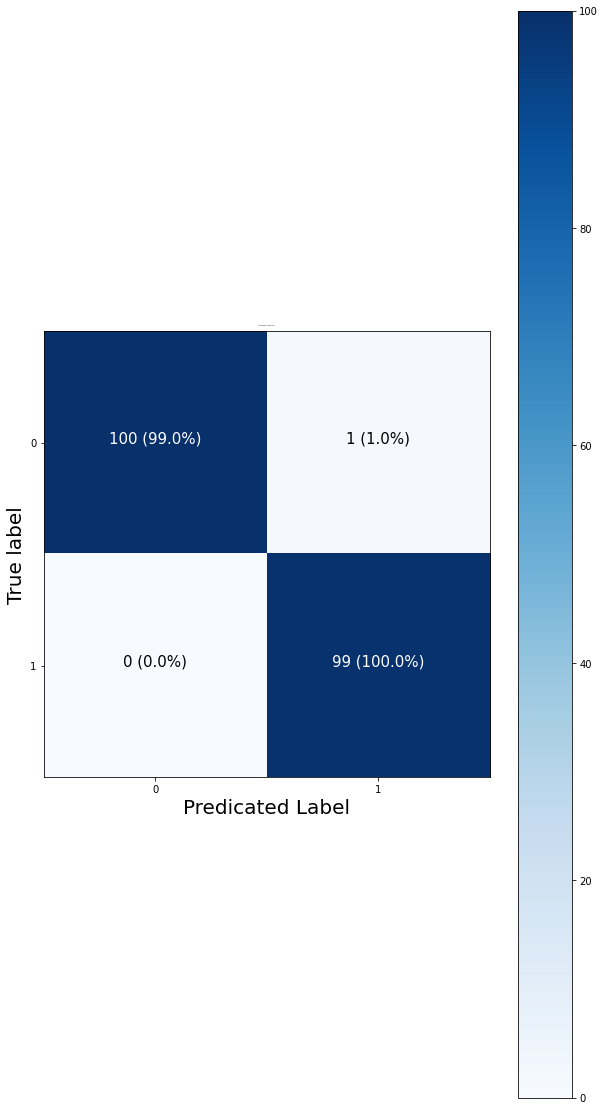

In [83]:
import itertools

figsize = (10, 20)

cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's pretiffy
fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)


# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axis

ax.set(
    title='Confusion Matrix',
    xlabel="Predicated Label",
    ylabel="True label",
    xticks=np.arange(n_classes),
    yticks=np.arange(n_classes),
    xticklabels=labels,
    yticklabels=labels
)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(2)

threshold = (cm.max()+cm.min())/2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)", horizontalalignment="center", color="white" if cm[i, j] > threshold else "black",size=15
             )
